## Задание 1

$$ f(x) = 20x^3-4x^2-5x+1 $$

Пользуемся теоремой о локализации корней алгебраического многочлена

Определим $ \alpha = \frac{\lvert a_3 \rvert}{\lvert a_3 \rvert +B}, \beta = 1 + \frac{A}{\lvert a_0 \rvert}, B = max\{20, 4, 5\} = 20, A = max\{4, 5, 1\} = 5 $ 

Тогда действительные корни лежат в пересечении действительной оси с кольцом с внутренним радиусом $ \alpha = \frac{1}{1+20} = \frac{1}{21} $ и внешним радиусом $ \beta = 1 + \frac{5}{20} = 1.25$ в комплексной плоскости (то есть на множестве $ [-1.25, -\frac{1}{21}] \cup [\frac{1}{21}, 1.25]$)

## Задание 2

In [1]:
import sympy as smp
from sympy import*

Воспользуемся теоремой о порядке сходимости метода простых итераций

In [2]:
x, a = symbols('x a')
def count_order_convergence(func, a):
    s = 1
    derr = Derivative(func, x).doit()
    value = derr.subs(x, a)
    while value == 0:
        s+=1
        derr = Derivative(derr, x).doit() 
        value = derr.subs(x, a)
    return s  

In [3]:
count_order_convergence(x - (11*x**4 - 4*x**2*a + a**2)/(16*x**5)*(x**2 - a), smp.sqrt(a))

4

То есть получили порядок сходимости, равный четырём

## Задание 3

Запишем метод простых итераций для шага метода Ньютона: $ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

$ f(x_n) = \lvert x_n \rvert ^\frac{5}{2}$, таким образом $ x_{n+1} = x_n - \frac{\lvert x_n \rvert ^\frac{5}{2}}{\frac{5}{2} \lvert x_n \rvert ^\frac{3}{2} sgn(x_n)} = x_n - \frac{2 \lvert x_n \rvert}{5 \cdot sgn(x_n)} = Ф(x_n)$

In [4]:
display(x - 2*smp.Abs(x)/(5*smp.sign(x)))

x - 2*Abs(x)/(5*sign(x))

In [5]:
print("Порядок сходимости =", count_order_convergence(x - 2*smp.Abs(x)/(5*smp.sign(x)), 0))

Порядок сходимости = 1


## Задача 4

$$ x^2 - 20\sin{x} = 0 $$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Визуализируем функцию

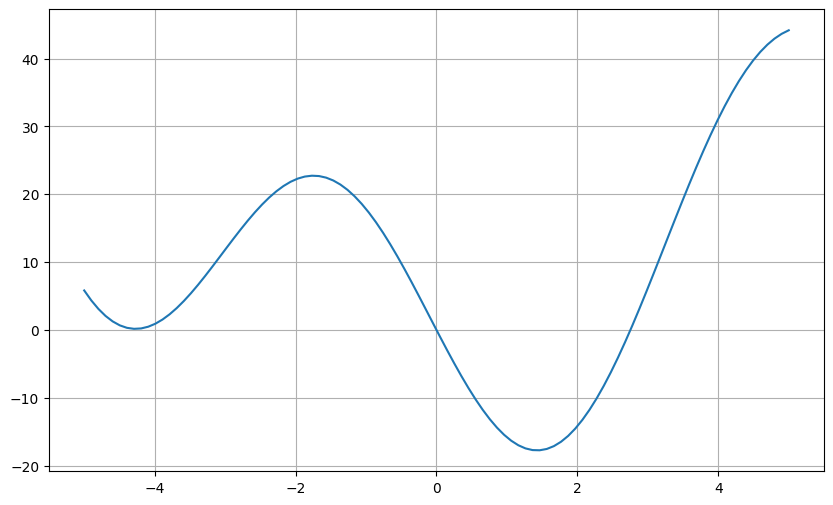

In [7]:
x = np.linspace(-5, 5, 100)
y = x**2 - 20*np.sin(x)
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.grid(True)

Корень $ x = 0 $ очевиден, уточним корень, лежащий на отрезке $[2, 4]$

In [8]:
def dichotomy(func, a, b, eps):
    while (b-a)>eps:
        x0 = (a+b)/2
        if func(x0)*func(a) < 0:
            b = x0
        else:
            a = x0
    return (a+b)/2

In [9]:
def f(x):
    return x**2 - 20*np.sin(x)

In [10]:
epsilon = 1e-5
a = 2
b = 4
dichotomy(f, a, b, epsilon)

2.752948760986328

Есть ли корень на $[-5, -3]$ ?

In [11]:
c = -5
d = -3
dichotomy(f, c, d, epsilon)

-3.0000038146972656

Очевидно, -3 не является корнем (синус минус тройки отрицателен, значит вся функция точно не нуль) , а значит дихотомия показала нам, что корня там на самом деле нет, поскольку он ожидался чуть левее -4

Сделаем ход конём и проверим ответ путём поиска минимума от квадрата функции через встроенную функцию scipy-я

In [12]:
from scipy.optimize import minimize_scalar

In [13]:
def g(x):
    return f(x)**2

In [14]:
minimize_scalar(g, bounds=[2,4]).x

2.7529481490147405

Результат совпадает в рамках требуемой точности эпсилон

$$ x2^x - 1 = 0 $$

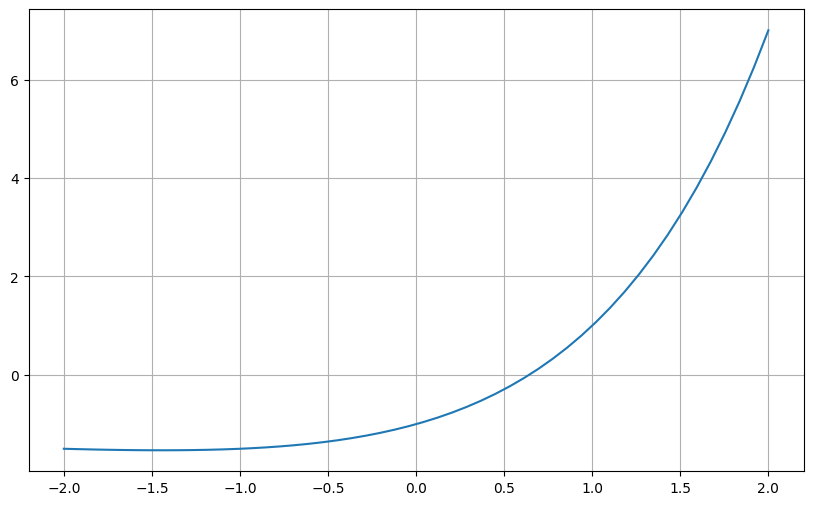

In [15]:
plt.figure(figsize=(10,6))
x_1 = np.linspace(-2, 2, 50)
y_1 = x_1*2**x_1 - 1
plt.plot(x_1,y_1)
plt.grid(True)
plt.show()

Корень ожидается от нуля до единицы

In [16]:
x = symbols('x')

In [17]:
def newton(func, x0, epsilon):

    derr = Derivative(func,x).doit()
    while smp.Abs(func.subs(x,x0)/float(derr.subs(x, x0))) > epsilon:
        x0 = x0 - func.subs(x,x0)/float(derr.subs(x, x0))
    
    return x0    

In [18]:
def h(x):
    return x*2**x - 1

In [19]:
newton(h(x), 1, 1e-5)

0.641188814965544

Повторяем фокус со встроенной функцией:

In [20]:
def h_square(x):
    return h(x)**2

In [21]:
minimize_scalar(h_square, bounds=[0, 1]).x

0.6411852118868456

И опять-таки результаты совпали в рамках требуемой погрешности $ \varepsilon = 10^{-5} $

## Задание 5

$$ \begin{cases}
\sin(x+1) - y - 1.2 = 0 \\
 2x+\cos{y} - 2 = 0 
 \end{cases}$$

In [130]:
x, y = smp.symbols('x y')

# Определение уравнений
eq1 = smp.sin(x+1) - y - 1.2
eq2 = 2*x + smp.cos(y) - 2

# Создание списка уравнений
equations = [eq1, eq2]

# Нахождение Якобиана
Jacobian_matrix = smp.Matrix([[smp.diff(eq, var) for var in (x, y)] for eq in equations])

# Вывод уравнений и матрицы Якоби
print("Система уравнений:")
for eq in equations:
    display(eq)

print("\nМатрица Якоби:")
display(Jacobian_matrix)

Система уравнений:


-y + sin(x + 1) - 1.2

2*x + cos(y) - 2


Матрица Якоби:


Matrix([
[cos(x + 1),      -1],
[         2, -sin(y)]])

In [128]:
def Newton_system(equations, J, values, eps):
    
    F_value = (-1)*np.array([equations[0].subs([(x, values[0]), (y, values[1])]) , equations[1].subs([(x, values[0]), (y, values[1])])]).astype(np.float64)
    J_value = np.array(J.subs([(x, values[0]), (y, values[1])])).astype(np.float64)   
    F_norm = np.linalg.norm(F_value, ord=2)  
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 1000:
        delta = np.linalg.solve(J_value, F_value)
        values = values + delta
        F_value = (-1)*np.array([equations[0].subs([(x, values[0]), (y, values[1])]) , equations[1].subs([(x, values[0]), (y, values[1])])]).astype(np.float64)
        J_value = np.array(J.subs([(x, values[0]), (y, values[1])])).astype(np.float64) 
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1

    return values, iteration_counter

In [131]:
print("Решение:", Newton_system(equations, Jacobian_matrix, np.array([0.5, -0.5]), 1e-3)[0],"; ", "Количество итераций:", Newton_system(equations, Jacobian_matrix, np.array([0.5, -0.5]), 1e-3)[1])

Решение: [ 0.51012957 -0.2016389 ] ;  Количество итераций: 2


Решим ту же систему через глобальную минимизацию скалярной функции: 

In [115]:
from scipy.optimize import minimize

In [132]:
def psi(array):
    return (np.sin(array[0]+1) - array[1] - 1.2)**2 + (2*array[0] + np.cos(array[1]) - 2)**2


In [133]:
minimize(psi, [0.5, -0.2]).x

array([ 0.51015015, -0.20183841])

С требуемой точностью эпсилон результаты совпадают

$$ \begin{cases}
\tg(xy+0.4) - x^2 = 0 \\
 0.6x^2 + 2y^2 -1 = 0 
 \end{cases}$$

Скопипастим с предыдущей системы, заменив лишь eq1 и eq2 (удобно, когда есть готовая функция!)

In [134]:
x, y = smp.symbols('x y')

# Определение уравнений
eq1 = smp.tan(x*y+0.4) - x**2
eq2 = 0.6*x**2 + 2*y**2 - 1

# Создание списка уравнений
equations = [eq1, eq2]

# Нахождение Якобиана
Jacobian_matrix = smp.Matrix([[smp.diff(eq, var) for var in (x, y)] for eq in equations])

# Вывод уравнений и матрицы Якоби
print("Система уравнений:")
for eq in equations:
    display(eq)

print("\nМатрица Якоби:")
display(Jacobian_matrix)

Система уравнений:


-x**2 + tan(x*y + 0.4)

0.6*x**2 + 2*y**2 - 1


Матрица Якоби:


Matrix([
[-2*x + y*(tan(x*y + 0.4)**2 + 1), x*(tan(x*y + 0.4)**2 + 1)],
[                           1.2*x,                       4*y]])

Подглядим, что решений четыре, и учитывая, что для каждого корня своя область притяжения, выберем четыре разные стартовые точки

In [135]:
print("Решение:", Newton_system(equations, Jacobian_matrix, np.array([0, 1]), 1e-3)[0],"; ", "Количество итераций:", Newton_system(equations, Jacobian_matrix, np.array([0.5, -0.5]), 1e-3)[1])
print("Решение:", Newton_system(equations, Jacobian_matrix, np.array([1, 0]), 1e-3)[0],"; ", "Количество итераций:", Newton_system(equations, Jacobian_matrix, np.array([0.5, -0.5]), 1e-3)[1])
print("Решение:", Newton_system(equations, Jacobian_matrix, np.array([0, -1]), 1e-3)[0],"; ", "Количество итераций:", Newton_system(equations, Jacobian_matrix, np.array([0.5, -0.5]), 1e-3)[1])
print("Решение:", Newton_system(equations, Jacobian_matrix, np.array([-1, 0]), 1e-3)[0],"; ", "Количество итераций:", Newton_system(equations, Jacobian_matrix, np.array([0.5, -0.5]), 1e-3)[1])

Решение: [-0.37984196  0.67582023] ;  Количество итераций: 3
Решение: [1.04843239 0.41261438] ;  Количество итераций: 3
Решение: [ 0.37984196 -0.67582023] ;  Количество итераций: 3
Решение: [-1.04843239 -0.41261438] ;  Количество итераций: 3


Аналогично через минимизацию скалярной функции:

In [118]:
def psi_new(array):
    return (np.tan(array[0]*array[1]+0.4) - array[0]**2)**2 + (0.6*array[0]**2 + 2*array[1]**2 - 1)**2

In [140]:
minimize(psi_new, [-0.4, 0.7]).x, minimize(psi_new, [1, 0.4]).x, minimize(psi_new, [0.4, -0.7]).x, minimize(psi_new, [-1, -0.4]).x

(array([-0.37984886,  0.67580631]),
 array([1.04840013, 0.41262227]),
 array([ 0.37984883, -0.67580633]),
 array([-1.04840015, -0.41262229]))

И результаты вновь отличаются в рамках требуемой точности эпсилон